In [62]:
import requests
from bs4 import BeautifulSoup
import time

str_header="""Host: www.104.com.tw
Connection: keep-alive
Accept: application/json, text/plain, */*
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36
Sec-Fetch-Site: same-origin
Sec-Fetch-Mode: cors
Sec-Fetch-Dest: empty
Referer: https://www.104.com.tw/job/6o5i0
Accept-Encoding: gzip, deflate, br
Accept-Language: zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7
"""

{'Date': 'Sat, 09 May 2020 00:37:57 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Length': '2228', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Front-End-Https': 'on', 'Set-Cookie': 'TS016ab800=01180e452d447870c5f452d85488b1a7ad8f0445b471a67640a3e4f8f1883525b34600a26adbd440752ab86b6cbb1b93aca7ae5fd6; Path=/'}

#headers = {i.split(": ")[0]:i.split(": ")[-1] for i in str_header.split("\n")}

#print(headers)



useragent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36"

#url="https://www.104.com.tw/job/2ybr3?jobsource=hotjob_chr"
url= 'https://www.104.com.tw/job/ajax/content/2ybr3'


headers={'Referer':'https://www.104.com.tw/job/2ybr3?jobsource=hotjob_chr',
        'user-agent' : useragent}
#headers={'user-agent' : useragent}

#print(cookie_dict)
#res=requests.get(url=url, headers=headers, cookies = cookie_dict)
res=requests.get(url=url, headers=headers)

#res=requests.Response(url) 

#ss=requests.session()
#ss.cookies['TS016ab800'] = '01180e452d84d2fb1578edb1c8e0a3d9327411e119ada25b25c397c16877d502818ba08e7d9849cb6b463a62b159935eab716798fc'
#res=requests.get(url, headers, timeout=120.0)
#res=ss.get(url)
time.sleep(1)
#print(res.headers)
#print(res.status_code)
#print(res.encoding)
#print(res.json())
print(res.text)

#print(res.cookies)
#print(res.content)


#soup= BeautifulSoup(res.text, 'html.parser')
#soup.text
#joblist=soup.select('article')    


{"data":{"corpImageRight":{"corpImageRight":{"imageUrl":"","link":""}},"header":{"corpImageTop":{"imageUrl":"","link":""},"jobName":"\u8ca1\u7522\u518d\u4fdd\u696d\u52d9\u4eba\u54e1","appearDate":"2020\/05\/04","custName":"\u4e2d\u592e\u518d\u4fdd\u96aa\u80a1\u4efd\u6709\u9650\u516c\u53f8","custUrl":"https:\/\/www.104.com.tw\/company\/539xizc","applyDate":"","analysisType":3,"analysisUrl":"\/\/www.104.com.tw\/jobs\/apply\/analysis?j=5d3d45296139425934353d6633413b2083f3d476e3b494124242424213c642928654j00","isSaved":false,"isApplied":false},"contact":{"hrName":"\u8a79\u5c0f\u59d0","email":"","visit":"","phone":"","other":"\u8acb\u4ee5\u4e0b\u5217\u65b9\u5f0f\u5831\u540d\uff0c\u8b1d\u8b1d\uff5e\r\n\r\n\uff0a\u8acb\u90f5\u5bc4\u4e0b\u5217\u8cc7\u6599\u81f3\u672c\u516c\u53f8(\u4fe1\u5c01\u5de6\u4e0a\u89d2\u8acb\u8a3b\u660e\u61c9\u5fb5\u8077\u5225) \r\n\u3000\u4e00\u3001\u672c\u516c\u53f8\u5236\u5f0f\u5831\u540d\u8868\u4e00\u5f35(\u5167\u5bb9\u8acb\u89aa\u7b46\u66f8\u5beb\u4e26\u9644\u8cbc\u

# 

In [63]:
import json
from selenium.webdriver import Chrome
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
#driver=Chrome('./chromedriver')
driver = webdriver.Chrome(desired_capabilities=caps)
caps = DesiredCapabilities.CHROME
caps['loggingPrefs'] = {'performance': 'ALL'}

#url= 'https://www.104.com.tw/job/ajax/content/6o5i0'
#url= 'https://www.104.com.tw/job/2ybr3?jobsource=hotjob_chr'

driver.get('https://stackoverflow.com/questions/52633697/selenium-python-how-to-capture-network-traffics-response')
#driver.get(url)
#cookie=driver.get_cookies()

#for c in cookie:
#    print(c)

def process_browser_log_entry(entry):
    response = json.loads(entry['message'])['message']
    return response



browser_log = driver.get_log('performance') 
events = [process_browser_log_entry(entry) for entry in browser_log]
events = [event for event in events if 'Network.response' in event['method']]
print(events)

InvalidArgumentException: Message: invalid argument: log type 'performance' not found
  (Session info: chrome=81.0.4044.138)


# HAR 分析 

In [41]:
from browsermobproxy import Server
from selenium import webdriver
from selenium.webdriver import Chrome

base_url= 'https://www.104.com.tw/job/2ybr3?jobsource=hotjob_chr'
server = Server("./browsermob-proxy-2.1.4/bin/browsermob-proxy.bat")
#server = Server('./browsermob-proxy-2.1.4/bin/browsermob-proxy')
server.start()
proxy = server.create_proxy()

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
 
chrome_options = Options()
chrome_options.add_argument('--ignore-certificate-errors')
chrome_options.add_argument('--proxy-server={0}'.format(proxy.proxy))
chrome_options.add_argument('--disable-gpu')
chrome_driver='./chromedriver'
driver = webdriver.Chrome(executable_path=chrome_driver, chrome_options = chrome_options)

proxy.new_har(base_url)
driver.get(base_url)


result = proxy.har
print (result)
    
for entry in result['log']['entries']:
    print(entry['request']['url'])


server.stop()
driver.quit()

D:\Anaconda3\envs\Tibame_python\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: use options instead of chrome_options


{'log': {'version': '1.2', 'creator': {'name': 'BrowserMob Proxy', 'version': '2.1.4', 'comment': ''}, 'pages': [{'id': 'https://www.104.com.tw/job/2ybr3?jobsource=hotjob_chr', 'startedDateTime': '2020-05-09T15:50:47.777+08:00', 'title': 'https://www.104.com.tw/job/2ybr3?jobsource=hotjob_chr', 'pageTimings': {'comment': ''}, 'comment': ''}], 'entries': [{'pageref': 'https://www.104.com.tw/job/2ybr3?jobsource=hotjob_chr', 'startedDateTime': '2020-05-09T15:50:48.055+08:00', 'request': {'method': 'GET', 'url': 'https://www.104.com.tw/job/2ybr3?jobsource=hotjob_chr', 'httpVersion': 'HTTP/1.1', 'cookies': [], 'headers': [], 'queryString': [{'name': 'jobsource', 'value': 'hotjob_chr'}], 'headersSize': 573, 'bodySize': 0, 'comment': ''}, 'response': {'status': 200, 'statusText': 'OK', 'httpVersion': 'HTTP/1.1', 'cookies': [], 'headers': [], 'content': {'size': 0, 'mimeType': 'text/html; charset=UTF-8', 'comment': ''}, 'redirectURL': '', 'headersSize': 351, 'bodySize': 2228, 'comment': ''}, 'c

In [78]:
import requests
from bs4 import BeautifulSoup
import re
import os
import time
import random
import json


if os.path.exists('job101_info_json'):
    pass
else:
    os.mkdir('job101_info_json')

useragent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36"

headers={'user-agent' : useragent}


for page in range(27,28):
    
    keywords = {'ro':'1', # 限定全職的工作，如果不限定則輸入0
             'keyword':'大數據%20bigdata', # 想要查詢的關鍵字
             'area':'6001001000', # 限定在台北的工作
             'isnew':'30', # 只要最近一個月有更新的過的職缺
             'order':'15', #每個page顯示的數量
             'page': str(page), #第幾個page
             'mode':'s'} #'l' 清單的瀏覽模式, 's' 複雜的瀏覽模式

    url='https://www.104.com.tw/jobs/search/?\
    ro={ro}&keyword={keyword}&area={area}&isnew={isnew}&order={order}&page={page}&mode={mode}'.format(**keywords)

    #print(url)


    res=requests.get(url, headers)
    soup= BeautifulSoup(res.text, 'html.parser')
    joblist=soup.select('article')   
    
    
    for eachjob in joblist:
        try:
            #print(eachjob)
            url= eachjob.select('a.js-job-link')[0]['href']
            #print(url)
            _headers={'Referer':'https:' + url,
                     'user-agent' : useragent}
            #print(_headers)
        except IndexError:
            continue
        json_url_str= re.findall("job.*\?", url)[0].replace('job/',"").replace('?',"")
        json_url='https://www.104.com.tw/job/ajax/content/'+json_url_str
        _res=requests.get(url=json_url, headers=_headers)
        #print(page, json_url)
        #print(_res.text)
    
        time.sleep(random.uniform(2,5))
        
        #soup= BeautifulSoup(_res.text, 'html.parser')
        json_data=json.loads(_res.text)
        json_job=json_data['data']
        filename='./job101_info_json/{}.json'.format(json_url_str)
        with open(filename, 'w') as f:
            json.dump(json_job, f)
        print('processing page: {}: write to {}'.format(page, filename))

processing page: 27: write to ./job101_info_json/6vnje.json
processing page: 27: write to ./job101_info_json/6ummh.json
processing page: 27: write to ./job101_info_json/6uy7z.json
processing page: 27: write to ./job101_info_json/6sw8f.json
processing page: 27: write to ./job101_info_json/6vfsj.json
processing page: 27: write to ./job101_info_json/6v8sq.json
processing page: 27: write to ./job101_info_json/6w732.json
processing page: 27: write to ./job101_info_json/6xnqm.json
processing page: 27: write to ./job101_info_json/6xsfl.json
processing page: 27: write to ./job101_info_json/6xtah.json
processing page: 27: write to ./job101_info_json/6xo30.json
processing page: 27: write to ./job101_info_json/6xtpc.json


# import Json to Pandas

In [ ]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import re
import os


source_file_path='./job101_info_json'
file_list=os.listdir(source_file_path)

jobinfo_List=[]

for each_file in file_list:
    cpath=source_file_path+'/'+each_file

    with open(cpath, 'r') as f:
        each_jobinfo_Dict= json.loads(f.read())
        #print(each_jobinfo_Dict)
        
    jobinfo_List.append(each_jobinfo_Dict)
#df= json_normalize(jobinfo_List, max_level=2) 
df= json_normalize(jobinfo_List, max_level=2)
df.head()

# Confirm Pandas Columns

In [ ]:
df2=df.copy()
df2.columns

# Confirm condition.other infomation  
# Apply FIlter for Skill Analysis

In [ ]:
import pandas as pd
import json
import jieba


source_file_path='./job101_info_json'
file_list=os.listdir(source_file_path)

jobinfo_List=[]

for each_file in file_list:
    cpath=source_file_path+'/'+each_file

    with open(cpath, 'r') as f:
        each_jobinfo_Dict= json.loads(f.read())
        #print(each_jobinfo_Dict)
        
    jobinfo_List.append(each_jobinfo_Dict)
    
df= json_normalize(jobinfo_List, max_level=2)



#for english space of keywords
#jieba.re_han_default = re.compile("([\u4E00-\u9FD5a-zA-Z0-9+#&\._% ]+)", re.U)
jieba.re_han_default = re.compile('(.+)', re.U) 

#load userdict
jieba.load_userdict('./jobskill.txt')

#jieba.add_word('Data Mining')
#jieba.add_word('Data Modeling')
#jieba.add_word('neural network')
#jieba.add_word('machine learning')

# import skill-definition
jobskill_def=[]

with open('jobskill.txt', 'r', encoding='utf-8') as file:
    for _skill in file.readlines():
        _skill = _skill.strip()
        jobskill_def.append(_skill.upper())
#print(jobskill_def)
        
def skill_filter(skillDesc):
    #print(skillDesc)
    #skillDesc=skillDesc.split('\n')
    #all_line=""
    #for line in skillDesc:
    #    all_line+=line
        
    #print(all_line)
    #jieba_list=jieba.cut(all_line, cut_all=True)
    jieba_list=jieba.cut(skillDesc, cut_all=False)
    #jieba_list=jieba.cut(all_line, cut_all=False)
    #print("|".join(jieba_list))
    
    skill_Dict={}
    for _skill in jobskill_def:
        skill_Dict[_skill] = 0
    
    for _word in jieba_list:
        _word = re.sub("[\!\%\[\]\,\。,\.]", "", _word)
        #_word = re.sub(u'[^0-9a-zA-Z\u4e00-\u9fa5.，,。？“”]+',"", _word)
        #print(_word)

        if _word.upper() in jobskill_def:
            skill_Dict[_word.upper()]=1
    #print(skill_Dict)
    
    _job_skill_list=[]
    
    for k, v in skill_Dict.items():
         _job_skill_list.append(v)
        
    return _job_skill_list



data1="""(1) 資料庫語言 (SQL)\n(2) ETL 工具 (Trinity)\n(3) 爬網程式\
(Python)\n(4) Data Mining (R/SAS/SPSS)\n(5) Data Modeling\n(6) 熟悉大數據架構(HDFS)\n(7)\
#統計分析專業知識\n(8) 掌握各產業知識"""

data2 = """1.國內外大學以上(數理統計、資工資管等相關等系所畢)。\n2.
熟悉資料結構與關聯式資料庫存取語言SQL並具備ETL相關技術。\n3.
熟悉Hadoop架構與Spark。\n4.具備程式撰寫能力(R或Python)。\n5.
具大數據機器學習相關開發框架(如TensorFlow)經驗佳。"""


#print(skill_filter(data1))
#print(skill_filter(data2))

df2['condition.other']=df2['condition.other'].apply(skill_filter)
df2[['condition.other']].head()

print("analysis is done!!")

#Split condition.other by jobskill_def
df2[jobskill_def] = df2['condition.other'].apply(pd.Series)
df2[jobskill_def].head()

# Accept role Analysis

In [ ]:
Index_condition=['condition.acceptRole.role', 
        'condition.workExp', 'condition.edu',
        'condition.major', 'condition.language','condition.other']
df2[Index_condition].head()

In [ ]:
def role_filter(rolelist):
    if isinstance(rolelist, list):
        rolelist_filter=[]
        for _role_dict in rolelist:
            rolelist_filter.append(_role_dict['description'])
        return rolelist_filter
    else:
        return rolelist
    
#print(role_filter(rolelist))
df2['condition.acceptRole.role']= df2['condition.acceptRole.role'].apply(role_filter)
df2[['condition.acceptRole.role']].head()

# Double Check Info for CSV File

In [ ]:
Index_header=[]
Index_header=['header.jobName', 'header.appearDate','header.custName', 'header.custUrl']
df2[Index_header].head(10)

In [ ]:
Index_JD=['jobDetail.salary', 'jobDetail.salaryMin', 'jobDetail.salaryMax',
        'jobDetail.addressRegion','jobDetail.needEmp']
df2[Index_JD].head()

In [ ]:
Index_JD=['jobDetail.salary', 'jobDetail.salaryMin', 'jobDetail.salaryMax',
        'jobDetail.addressRegion','jobDetail.needEmp']
Index_header.extend(Index_JD)
df2[Index_header].head()

In [ ]:
Index_contact=['contact.hrName', 'contact.email','contact.phone']
df2[Index_contact].head()

In [ ]:
Index_contact=['contact.hrName', 'contact.email','contact.phone']
Index_header.extend(Index_contact)
df2[Index_header].head()

In [ ]:
#add job skill items
Index_header.extend(jobskill_def)
df2[Index_header].head()

In [ ]:
#輸出csv
df2[Index_header].to_csv('./jbinfo_tmp.csv', index=0, encoding='utf-8-sig')
print("CSV output success!!")

# Final: Unite Code from josn reading to pandas/csv

In [80]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import re
import os
import jieba

def json2pd(path):
    file_list=os.listdir(path)
    jobinfo_list=[]

    for each_file in file_list:
        cpath=source_file_path+'/'+each_file

        with open(cpath, 'r') as f:
            _jobinfo= json.loads(f.read())
        jobinfo_list.append(_jobinfo)  
    return json_normalize(jobinfo_list, max_level=2) 

def role_filter(rolelist):
    if isinstance(rolelist, list):
        rolelist_filter=[]
        for _role_dict in rolelist:
            rolelist_filter.append(_role_dict['description'])
        return rolelist_filter
    else:
        return rolelist
    
def skill_filter(skillDesc):
    jieba_list=jieba.cut(skillDesc, cut_all=False)
    skill_Dict={}
    for _skill in jobskill_def:
        skill_Dict[_skill] = 0
    
    for _word in jieba_list:
        _word = re.sub("[\!\%\[\]\,\。,\.]", "", _word)
        #_word = re.sub(u'[^0-9a-zA-Z\u4e00-\u9fa5.，,。？“”]+',"", _word)
        #print(_word)
        if _word.upper() in jobskill_def:
            skill_Dict[_word.upper()]=1
    
    _job_skill_list=[]
    
    for k, v in skill_Dict.items():
         _job_skill_list.append(v)
        
    return _job_skill_list


source_file_path='./job101_info_json'
df=json2pd(source_file_path)
jobskill_def=[]

with open('./jobskill.txt', 'r', encoding='utf-8') as file:
    for _skill in file.readlines():
        _skill = _skill.strip()
        jobskill_def.append(_skill.upper())

df['condition.other']=df['condition.other'].apply(skill_filter)
df[jobskill_def] = df['condition.other'].apply(pd.Series)
df['condition.acceptRole.role']= df['condition.acceptRole.role'].apply(role_filter)


#df colunm selection

Index_header=['header.jobName', 'header.appearDate','header.custName', 'header.custUrl',
              'condition.acceptRole.role', 'condition.workExp', 'condition.edu',
              'condition.major', 'condition.language','condition.other',
              'jobDetail.salary', 'jobDetail.salaryMin', 'jobDetail.salaryMax',
              'jobDetail.addressRegion','jobDetail.needEmp',
              'contact.hrName', 'contact.email','contact.phone']

Index_header.extend(jobskill_def)

df[Index_header].to_csv('./jbinfo_tmp.csv', index=0, encoding='utf-8-sig')
print("CSV output success!!")

df[Index_header].head()

D:\Anaconda3\envs\Tibame_python\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.065 seconds.
Prefix dict has been built succesfully.


CSV output success!!


,header.jobName,header.appearDate,header.custName,header.custUrl,condition.acceptRole.role,condition.workExp,condition.edu,condition.major,condition.language,condition.other,...,SCALA,SQOOP,SOLR,SPARK,SQL,SAS,SPSS,TENSORFLOW,TRINITY,ZOOKEEPER
0,"數位廣告業務助理 (酷比廣告, 宇匯知識科技)",2020/05/06,宇匯知識科技股份有限公司,https://www.104.com.tw/company/18rbx5fk,"[上班族, 應屆畢業生]",不拘,專科、大學、碩士,[],"[{'language': '英文', 'ability': '聽 /略懂、說 /略懂、讀 ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0,0,0,0,0,0,0,0,0,0
1,JAVA程式設計師(全球第二大IT通路集團),2020/05/04,聯強國際股份有限公司,https://www.104.com.tw/company/aldnfbc,"[上班族, 應屆畢業生]",不拘,大學、碩士,"[資訊管理相關, 資訊工程相關, 數學及電算機科學學科類]",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0,0,0,0,0,0,0,0,0,0
2,軟體開發部門主管(全球第二大IT通路集團),2020/05/06,聯強國際股份有限公司,https://www.104.com.tw/company/aldnfbc,[上班族],10年以上,大學以上,"[數學及電算機科學學科類, 商業及管理學科類, 工程學科類]","[{'language': '英文', 'ability': '聽 /精通、說 /精通、讀 ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0,0,0,0,0,0,0,0,0,0
3,業務開發副理,2020/05/08,英丰寶資訊股份有限公司,https://www.104.com.tw/company/155q2nxk,[上班族],3年以上,大學、碩士,[],"[{'language': '英文', 'ability': '聽 /中等、說 /中等、讀 ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0,0,0,0,0,0,0,0,0,0
4,資料庫工程師(全球第二大IT通路集團),2020/05/05,聯強國際股份有限公司,https://www.104.com.tw/company/aldnfbc,[上班族],2年以上,專科、大學、碩士,"[資訊管理相關, 資訊工程相關, 數學及電算機科學學科類]",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0,0,0,0,1,0,0,0,0,0


# 薪資分析

In [79]:
(df[['jobDetail.salaryMin','jobDetail.salaryMax']])[(df['jobDetail.salaryMin'] > 0)].describe()

NameError: name 'df' is not defined

# Job Skill Analysis

In [82]:
df_statics=df[jobskill_def].sum().sort_values(ascending=False)
df_statics

PYTHON              99
SQL                 86
JAVA                62
R                   38
MYSQL               36
JAVASCRIPT          33
HADOOP              32
C                   31
SPARK               27
C++                 25
C#                  23
MONGODB             23
AI                  20
AWS                 19
ETL                 18
HIVE                18
SAS                 14
SCRUM               12
TENSORFLOW          12
KAFKA               11
HBASE                9
SCALA                9
SPSS                 8
AGILE                7
ELASTICSEARCH        5
OOZIE                3
HDFS                 3
LUIGI                2
SQOOP                2
FLUME                2
FLUENTD              2
ZOOKEEPER            1
GOLANG               1
TRINITY              1
PIG                  1
SOLR                 1
LUCENE               1
DATA MODELING        0
DATA MINING          0
MACHINE LEARNING     0
NEURAL NETWORK       0
dtype: int64

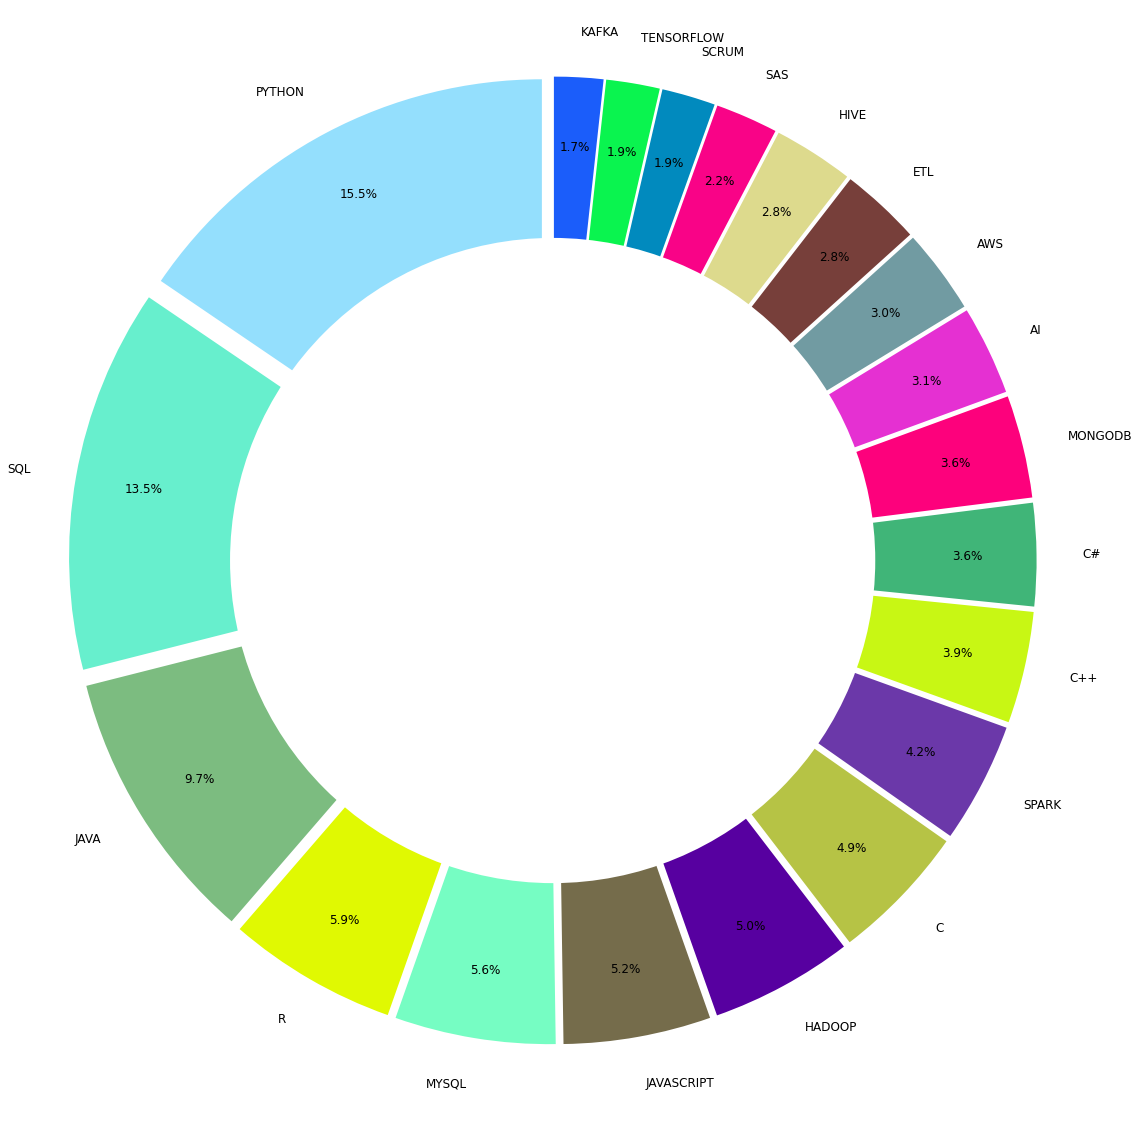

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import random


# Pie chart
sizes=[]
for x in df_statics[:20].values:
    if x>0:
        sizes.append(x)

labels=df_statics.index[:len(sizes)]

number_of_colors = len(sizes)

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
#print(colors)

#print(len(colors))
#colors
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

#explsion

s=[0.05]*len(sizes)
explode = tuple(s)

fig = plt.figure(figsize=(16,16))

plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 12}, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
df_statics.head()

In [ ]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

word_dict= df_statics.to_dict()

#print(word_dict)

#for k,v in word_list:
#    d[k] = int(v)

#wordcloud = WordCloud(font_path='simhei.ttf', width = 800, height = 800, 
#                background_color ='white', min_font_size = 10).generate(text) 
#wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(text) 
#

wordcloud = WordCloud(width = 800, height = 800, background_color ='white',
                      min_font_size = 10).generate_from_frequencies(word_dict) 
 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
